In [199]:
import pandas as pd
import numpy as np
import re 

## Creating Data Frame df

In [200]:
df = pd.read_csv(r'C:\Users\hp\Downloads\Neurance AI\train.csv')

Columns in df 

In [201]:
df.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score'],
      dtype='object')

In [202]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


## Data Analysis

In [203]:
df.shape

(32165, 8)

In [204]:
df['base_score'].nunique()

1383

After observing , 'base_score' feature column is of continuous type. 

unique values in the feature columns 

In [205]:
for column in df.columns:
    print(column , ' has ', df[column].nunique() , ' values')

patient_id  has  32165  values
name_of_drug  has  2220  values
use_case_for_drug  has  636  values
review_by_patient  has  30121  values
effectiveness_rating  has  10  values
drug_approved_by_UIC  has  3537  values
number_of_times_prescribed  has  303  values
base_score  has  1383  values


Checking if dataset have any missing/nan values in any feature 

In [206]:
for column in df.columns:
    print(column , ' has ' , df[column].isnull().sum() , ' mising values')

patient_id  has  0  mising values
name_of_drug  has  0  mising values
use_case_for_drug  has  0  mising values
review_by_patient  has  0  mising values
effectiveness_rating  has  0  mising values
drug_approved_by_UIC  has  0  mising values
number_of_times_prescribed  has  0  mising values
base_score  has  0  mising values


In [207]:
df['name_of_drug'].unique()

array(['Valsartan', 'Guanfacine', 'Lybrel', ..., 'Benzamycin', 'Midamor',
       'Didrex'], dtype=object)

A Particular drug is used for how many purposes

In [208]:
for value in df['name_of_drug'].unique():
    print('Drug : ',value , ' is used for')
    uses = list(df[df['name_of_drug']==value]['use_case_for_drug'].unique())
    for use in uses:
        print(use)
    print()

Drug :  Valsartan  is used for
Left Ventricular Dysfunction
High Blood Pressure

Drug :  Guanfacine  is used for
ADHD
Tourette's Syndrome

Drug :  Lybrel  is used for
Birth Control

Drug :  Buprenorphine / naloxone  is used for
Opiate Dependence
Not Listed / Othe

Drug :  Cialis  is used for
Benign Prostatic Hyperplasia
Erectile Dysfunction
17</span> users found this comment helpful.
9</span> users found this comment helpful.

Drug :  Ethinyl estradiol / levonorgestrel  is used for
Birth Control
Abnormal Uterine Bleeding
Endometriosis
Ovarian Cysts
Premenstrual Syndrome
Polycystic Ovary Syndrome

Drug :  L-methylfolate  is used for
Depression
lic Acid Deficiency

Drug :  Amitriptyline  is used for
ibromyalgia
Anxiety and Stress
Post Traumatic Stress Disorde
Migraine Prevention
Pain
Insomnia
Interstitial Cystitis
Irritable Bowel Syndrome
Depression
Cyclic Vomiting Syndrome
Reflex Sympathetic Dystrophy Syndrome
Vulvodynia
Burning Mouth Syndrome

Drug :  Lamotrigine  is used for
Bipolar D

Obesity
Weight Loss

Drug :  Tamsulosin  is used for
Benign Prostatic Hyperplasia
Urinary Tract Stones
Overactive Bladde

Drug :  Testim  is used for
Hypogonadism, Male
8</span> users found this comment helpful.
18</span> users found this comment helpful.

Drug :  Orthovisc  is used for
Osteoarthritis
10</span> users found this comment helpful.

Drug :  Naltrexone  is used for
Opiate Dependence
Alcohol Dependence
ibromyalgia
Trichotillomania

Drug :  Mirtazapine  is used for
Insomnia
Major Depressive Disorde
Depression
Obsessive Compulsive Disorde
Post Traumatic Stress Disorde
Anxiety
Not Listed / Othe

Drug :  Aripiprazole  is used for
Autism
Bipolar Disorde
Schizophrenia
Depression
Schizoaffective Disorde
Agitated State
Major Depressive Disorde
Borderline Personality Disorde
Tourette's Syndrome

Drug :  Varenicline  is used for
Smoking Cessation
Not Listed / Othe

Drug :  Clindamycin  is used for
Surgical Prophylaxis
Bacterial Vaginitis
Bacterial Infection
Sinusitis
Skin or Soft Tiss

Atrial Fibrillation
Ventricular Tachycardia

Drug :  Dapsone  is used for
Acne
Leukocytoclastic Vasculitis

Drug :  Paliperidone  is used for
Schizophrenia
Schizoaffective Disorde
Bipolar Disorde
Depression
Autism

Drug :  Copper  is used for
Birth Control

Drug :  Pseudoephedrine / triprolidine  is used for
Cold Symptoms

Drug :  Depo-Provera  is used for
Birth Control
Abnormal Uterine Bleeding
Endometriosis
19</span> users found this comment helpful.
0</span> users found this comment helpful.
2</span> users found this comment helpful.
3</span> users found this comment helpful.

Drug :  Levetiracetam  is used for
Seizures
Epilepsy
Neuralgia
Bipolar Disorde

Drug :  Phentermine  is used for
Weight Loss
Obesity
Not Listed / Othe

Drug :  Pristiq  is used for
Depression
Obesity
Anxiety
Bipolar Disorde
Post Traumatic Stress Disorde
Panic Disorde
Major Depressive Disorde
ibromyalgia

Drug :  Ammonium lactate  is used for
Dry Skin

Drug :  Zyvox  is used for
Methicillin-Resistant Staphyloco

High Blood Pressure

Drug :  Lorcaserin  is used for
Obesity
Weight Loss

Drug :  Cymbalta  is used for
Chronic Pain
4</span> users found this comment helpful.
ibromyalgia
Depression
Pain
Back Pain
Major Depressive Disorde
Peripheral Neuropathy
Bipolar Disorde
Anxiety
Generalized Anxiety Disorde
Diabetic Peripheral Neuropathy
Osteoarthritis
3</span> users found this comment helpful.

Drug :  Guaifenesin / phenylephrine  is used for
Cough and Nasal Congestion
Sinus Symptoms

Drug :  Monistat 7  is used for
Vaginal Yeast Infection

Drug :  Ativan  is used for
Anxiety
Insomnia
Nausea/Vomiting, Chemotherapy Induced
Panic Disorde

Drug :  Levemir  is used for
Diabetes, Type 2

Drug :  MoviPrep  is used for
Bowel Preparation

Drug :  Voltaren Gel  is used for
Pain
Osteoarthritis

Drug :  Podofilox  is used for
Condylomata Acuminata

Drug :  Restoril  is used for
Insomnia

Drug :  Tioconazole  is used for
Vaginal Yeast Infection

Drug :  Viagra  is used for
Erectile Dysfunction
34</span> user

Abnormal Uterine Bleeding
Birth Control
4</span> users found this comment helpful.
0</span> users found this comment helpful.
6</span> users found this comment helpful.

Drug :  Patanol  is used for
Seasonal Allergic Conjunctivitis

Drug :  Benzoyl peroxide / clindamycin  is used for
Acne

Drug :  Pimecrolimus  is used for
Eczema
Perioral Dermatitis

Drug :  Paxil  is used for
Anxiety
Panic Disorde
Post Traumatic Stress Disorde
Major Depressive Disorde
Depression
Obsessive Compulsive Disorde
Anxiety and Stress
Generalized Anxiety Disorde
5</span> users found this comment helpful.
Social Anxiety Disorde
Postmenopausal Symptoms

Drug :  Remeron  is used for
Depression
Insomnia
Major Depressive Disorde
Anxiety

Drug :  Clocortolone  is used for
Psoriasis

Drug :  Fluticasone  is used for
Atopic Dermatitis
Rhinitis
Allergic Rhinitis
Asthma, Maintenance
Lichen Sclerosus

Drug :  Aluminum chloride hexahydrate  is used for
Hyperhidrosis

Drug :  Lactobacillus acidophilus  is used for
Irritabl

Drug :  OnabotulinumtoxinA  is used for
Migraine Prevention
acial Wrinkles
Overactive Bladde
Migraine
Cervical Dystonia
Strabismus
Dystonia
Urinary Incontinence

Drug :  Vyvanse  is used for
Binge Eating Disorde
ADHD
Asperger Syndrome

Drug :  Magnesium citrate  is used for
Constipation

Drug :  Rosuvastatin  is used for
High Cholesterol, Familial Heterozygous
High Cholesterol
Atherosclerosis

Drug :  Tri-Lo-Sprintec  is used for
Birth Control
Endometriosis
Abnormal Uterine Bleeding

Drug :  Isotretinoin  is used for
Acne
Rosacea
Not Listed / Othe

Drug :  Clonidine  is used for
Bipolar Disorde
Opiate Withdrawal
Perimenopausal Symptoms
Anxiety
Insomnia, Stimulant-Associated
High Blood Pressure
ADHD
Alcohol Withdrawal
Migraine Prevention
Tourette's Syndrome
Hyperhidrosis
Hypertensive Emergency
Benzodiazepine Withdrawal

Drug :  Comtan  is used for
Parkinson's Disease

Drug :  Alvesco  is used for
Asthma, Maintenance
Asthma

Drug :  Hydromet  is used for
Cough

Drug :  Namenda XR  is use

Psoriasis
Rheumatoid Arthritis
Systemic Sclerosis
Psoriatic Arthritis
Eczema
Scleroderma

Drug :  Loperamide  is used for
Diarrhea
Diarrhea, Chronic
Traveler's Diarrhea

Drug :  Magnesium hydroxide  is used for
Constipation
Indigestion

Drug :  Conjugated estrogens / medroxyprogesterone  is used for
Postmenopausal Symptoms

Drug :  Levofloxacin  is used for
Sinusitis
Bronchitis
Pneumonia
Skin or Soft Tissue Infection
Urinary Tract Infection
Bladder Infection
Streptococcal Infection
Bacterial Infection
Prostatitis

Drug :  Propoxyphene  is used for
Pain

Drug :  Lyza  is used for
Birth Control

Drug :  Ritalin  is used for
ADHD
Narcolepsy
17</span> users found this comment helpful.

Drug :  Sulfacetamide sodium / sulfur  is used for
Acne
Rosacea
Seborrheic Dermatitis

Drug :  Tiotropium  is used for
COPD, Maintenance

Drug :  Gatifloxacin  is used for
Conjunctivitis

Drug :  Methadose  is used for
Opiate Withdrawal

Drug :  Elmiron  is used for
Interstitial Cystitis
Bladder Infection

D

Birth Control
Abnormal Uterine Bleeding

Drug :  Metformin  is used for
Polycystic Ovary Syndrome
Diabetes, Type 2
min)
emale Infertility
Insulin Resistance Syndrome

Drug :  Dextroamphetamine  is used for
ADHD
Sexual Dysfunction, SSRI Induced
Narcolepsy

Drug :  Abreva  is used for
Herpes Simplex

Drug :  Dexilant  is used for
GERD
Erosive Esophagitis
Barrett's Esophagus

Drug :  Mestinon  is used for
Myasthenia Gravis
Dysautonomia

Drug :  Proctosol-HC  is used for
Hemorrhoids

Drug :  Tranylcypromine  is used for
Depression

Drug :  Felbatol  is used for
Epilepsy

Drug :  Sominex  is used for
Insomnia

Drug :  Dofetilide  is used for
Arrhythmia

Drug :  Amoxicillin  is used for
Bladder Infection
Bronchitis
Pneumonia
Tonsillitis/Pharyngitis
Not Listed / Othe
Dental Abscess
Helicobacter Pylori Infection
Otitis Media
Urinary Tract Infection
Upper Respiratory Tract Infection
Sinusitis
Bacterial Infection

Drug :  Makena  is used for
Premature Lab

Drug :  Lipitor  is used for
High Chole

Migraine

Drug :  Prilosec  is used for
GERD

Drug :  Fanapt  is used for
Schizophrenia
Psychosis
12</span> users found this comment helpful.

Drug :  Azilsartan medoxomil  is used for
High Blood Pressure

Drug :  Naloxone / pentazocine  is used for
Pain

Drug :  Trileptal  is used for
Bipolar Disorde
Seizures

Drug :  Roxicet  is used for
Chronic Pain
Pain

Drug :  Embeda  is used for
Pain
Chronic Pain

Drug :  Quillivant XR  is used for
ADHD

Drug :  Paromomycin  is used for
Dientamoeba fragilis

Drug :  Nucynta ER  is used for
Diabetic Peripheral Neuropathy
Pain

Drug :  Eluxadoline  is used for
Irritable Bowel Syndrome

Drug :  Stadol  is used for
Pain
Labor Pain

Drug :  Ranolazine  is used for
Angina

Drug :  Oruvail  is used for
Back Pain

Drug :  Zonegran  is used for
Seizures
Migraine Prevention

Drug :  Genvoya  is used for
HIV Infection

Drug :  Lantus Solostar  is used for
Diabetes, Type 2

Drug :  Lortab  is used for
Rheumatoid Arthritis
Pain
Back Pain

Drug :  Nefazodone 

Hypertriglyceridemia

Drug :  Cardizem  is used for
High Blood Pressure
Atrial Fibrillation

Drug :  Benadryl Allergy  is used for
Insomnia
Urticaria
Allergic Rhinitis
Allergic Reactions

Drug :  Galantamine  is used for
Alzheimer's Disease

Drug :  Alesse  is used for
Birth Control
Abnormal Uterine Bleeding
Endometriosis
3</span> users found this comment helpful.

Drug :  Campral  is used for
Alcohol Dependence

Drug :  Glucosamine  is used for
ibromyalgia

Drug :  Lemtrada  is used for
Multiple Sclerosis

Drug :  Buckleys Mixture  is used for
Cough

Drug :  Sutent  is used for
Renal Cell Carcinoma

Drug :  Bromfed DM  is used for
Cough and Nasal Congestion

Drug :  Phenol  is used for
Sore Throat
Tonsillitis/Pharyngitis

Drug :  Hydrochlorothiazide / spironolactone  is used for
High Blood Pressure

Drug :  Celebrex  is used for
Pain
Osteoarthritis
Rheumatoid Arthritis

Drug :  Zelnorm  is used for
Irritable Bowel Syndrome
Constipation, Chronic

Drug :  Pataday  is used for
Seasonal A

Rheumatoid Arthritis
Psoriatic Arthritis
Ulcerative Colitis

Drug :  Tetracycline  is used for
Acne

Drug :  Nasonex  is used for
Nasal Polyps
12</span> users found this comment helpful.
Allergic Rhinitis

Drug :  Ambien CR  is used for
Insomnia

Drug :  Naloxone  is used for
Opioid Overdose

Drug :  Repatha  is used for
High Cholesterol, Familial Heterozygous
High Cholesterol

Drug :  Gabarone  is used for
Diabetic Peripheral Neuropathy

Drug :  Finasteride  is used for
Benign Prostatic Hyperplasia
Androgenetic Alopecia

Drug :  Hylan g-f 20  is used for
Osteoarthritis

Drug :  Plaquenil  is used for
Sjogren's Syndrome
Rheumatoid Arthritis
Systemic Lupus Erythematosus
Undifferentiated Connective Tissue Disease

Drug :  Ionamin  is used for
Weight Loss

Drug :  Zepatier  is used for
Hepatitis C

Drug :  Aquoral  is used for
Xerostomia

Drug :  Acetaminophen / codeine  is used for
Pain
Cough

Drug :  Colchicine  is used for
Pseudogout, Prophylaxis
Gout, Acute
amilial Mediterranean Feve


Diabetes, Type 2

Drug :  Welchol  is used for
Diarrhea, Chronic
Diabetes, Type 2
High Cholesterol

Drug :  Climara  is used for
Postmenopausal Symptoms

Drug :  Everolimus  is used for
Renal Cell Carcinoma

Drug :  Marlissa  is used for
Birth Control

Drug :  Budesonide  is used for
Inflammatory Bowel Disease
Crohn's Disease
Asthma, Maintenance
Ulcerative Colitis
Ulcerative Colitis, Active
Crohn's Disease, Acute
Crohn's Disease, Maintenance

Drug :  Fastin  is used for
Weight Loss

Drug :  Calan  is used for
Migraine Prevention

Drug :  Ciclopirox  is used for
Onychomycosis, Toenail
Tinea Pedis

Drug :  Opium  is used for
Diarrhea

Drug :  Diamox  is used for
Pseudotumor Cerebri
Mountain Sickness / Altitude Sickness
Epilepsy
Glaucoma

Drug :  Zoledronic acid  is used for
Osteolytic Bone Lesions of Multiple Myeloma
Osteoporosis
Osteolytic Bone Metastases of Solid Tumors
Prevention of Osteoporosis

Drug :  Mucinex D Maximum Strength  is used for
Cough and Nasal Congestion

Drug :  Insul

Cough and Nasal Congestion

Drug :  Aflibercept  is used for
Macular Degeneration
Diabetic Macular Edema

Drug :  Mirapex  is used for
Restless Legs Syndrome

Drug :  Bromfenac  is used for
Postoperative Ocular Inflammation

Drug :  Symlin  is used for
Diabetes, Type 1

Drug :  Efudex  is used for
Skin Cance

Drug :  Tiger Balm  is used for
Pain

Drug :  Metadate CD  is used for
ADHD

Drug :  Aspirin / butalbital / caffeine / codeine  is used for
Headache

Drug :  Crisaborole  is used for
Atopic Dermatitis

Drug :  C1 esterase inhibitor (human)  is used for
Hereditary Angioedema

Drug :  Simvastatin  is used for
High Cholesterol
High Cholesterol, Familial Heterozygous
Cardiovascular Risk Reduction

Drug :  Calcitonin  is used for
Osteoporosis

Drug :  Interferon beta-1a  is used for
Multiple Sclerosis

Drug :  Pazopanib  is used for
Soft Tissue Sarcoma
Renal Cell Carcinoma

Drug :  Paxil CR  is used for
Generalized Anxiety Disorde
Depression
Anxiety

Drug :  Albendazole  is used for
As

COPD, Maintenance

Drug :  Clorazepate  is used for
Anxiety

Drug :  Telmisartan  is used for
High Blood Pressure

Drug :  Xigduo XR  is used for
Diabetes, Type 2

Drug :  Dificid  is used for
Clostridial Infection

Drug :  Amlodipine / valsartan  is used for
ge (amlodipine / valsartan)

Drug :  Cefzil  is used for
Upper Respiratory Tract Infection
Sinusitis
Pneumonia

Drug :  Goserelin  is used for
Prostate Cance
Bleeding Disorde
Endometriosis

Drug :  Hydrochlorothiazide / losartan  is used for
High Blood Pressure

Drug :  Ortho-Cept  is used for
Birth Control

Drug :  Docetaxel  is used for
Breast Cancer, Metastatic

Drug :  Blistex Lip Balm  is used for
Dry Skin

Drug :  Chlor-Trimeton  is used for
Allergic Reactions

Drug :  Azurette  is used for
Birth Control

Drug :  Fenofibric acid  is used for
High Cholesterol

Drug :  Ketoprofen  is used for
Pain

Drug :  Xopenex HFA  is used for
Asthma, acute

Drug :  Azelastine / fluticasone  is used for
Allergic Rhinitis

Drug :  Monurol  

Cold Symptoms

Drug :  Saliva substitutes  is used for
Xerostomia

Drug :  Senokot  is used for
Constipation

Drug :  Cinqair  is used for
Asthma

Drug :  Alirocumab  is used for
High Cholesterol
High Cholesterol, Familial Homozygous

Drug :  Tradjenta  is used for
Diabetes, Type 2

Drug :  Xtampza ER  is used for
Chronic Pain

Drug :  Dutasteride / tamsulosin  is used for
Benign Prostatic Hyperplasia

Drug :  Amnesteem  is used for
Acne

Drug :  Panlor SS  is used for
Pain

Drug :  Cataflam  is used for
Ankylosing Spondylitis
Pain
Back Pain
Period Pain
Osteoarthritis

Drug :  ProAir HFA  is used for
Asthma, Maintenance

Drug :  Daklinza  is used for
Hepatitis C

Drug :  Ortho Cyclen  is used for
Birth Control
Ovarian Cysts

Drug :  Renagel  is used for
Hyperphosphatemia of Renal Failure

Drug :  Tessalon  is used for
Cough

Drug :  Ergotamine  is used for
Migraine

Drug :  Potassium chloride  is used for
Prevention of Hypokalemia

Drug :  Phosphorated carbohydrate solution  is used fo

Raynaud's Syndrome

Drug :  Cetuximab  is used for
Colorectal Cance

Drug :  Melpaque HP  is used for
Dermatological Disorders

Drug :  Dextromethorphan / guaifenesin  is used for
Cough
Expectoration

Drug :  Hydralazine  is used for
High Blood Pressure

Drug :  Cortisone  is used for
Dermatomyositis

Drug :  Delatestryl  is used for
Hypogonadism, Male

Drug :  Esterified estrogens / methyltestosterone  is used for
Menopausal Disorders

Drug :  Ortho-Novum 7 / 7 / 7  is used for
Birth Control

Drug :  Midodrine  is used for
Hypotension
Dysautonomia
Postural Orthostatic Tachycardia Syndrome

Drug :  Simeprevir  is used for
Hepatitis C

Drug :  Famvir  is used for
Cold Sores
Herpes Simplex, Mucocutaneous/Immunocompetent Host

Drug :  Bivalirudin  is used for
Percutaneous Coronary Intervention

Drug :  Methyldopa  is used for
Hypertensive Emergency

Drug :  Benemid  is used for
Gout

Drug :  Phenobarbital  is used for
Seizures

Drug :  Incruse Ellipta  is used for
COPD

Drug :  Clozaril  

Meningococcal Meningitis Prophylaxis

Drug :  Caziant  is used for
Birth Control

Drug :  Mucinex Maximum Strength  is used for
Cough

Drug :  Nortrel 7 / 7 / 7  is used for
6</span> users found this comment helpful.

Drug :  Kenalog-40  is used for
Psoriasis

Drug :  Adoxa  is used for
Acne

Drug :  Aricept ODT  is used for
Mild Cognitive Impairment

Drug :  Eltrombopag  is used for
Thrombocytopenia

Drug :  Duexis  is used for
13</span> users found this comment helpful.
Osteoarthritis

Drug :  NoDoz  is used for
Hypersomnia

Drug :  Atelvia  is used for
Osteoporosis

Drug :  Permethrin  is used for
Head Lice

Drug :  Enskyce  is used for
Birth Control
21</span> users found this comment helpful.

Drug :  Indocin SR  is used for
Ankylosing Spondylitis

Drug :  Busulfan  is used for
Thrombocythemia

Drug :  Nytol  is used for
Insomnia

Drug :  Basaglar  is used for
Diabetes, Type 2

Drug :  Acetaminophen / diphenhydramine / phenylephrine  is used for
Cold Symptoms

Drug :  Parlodel  is 

Seborrheic Dermatitis

Drug :  Immune globulin intravenous and subcutaneous  is used for
Chronic Inflammatory Demyelinating Polyradiculoneuropathy

Drug :  Absorica  is used for
Acne

Drug :  Ketamine  is used for
Anesthesia

Drug :  Prenatal Plus  is used for
Vitamin/Mineral Supplementation during Pregnancy/Lactation

Drug :  Cesamet  is used for
Nausea/Vomiting, Chemotherapy Induced

Drug :  Eligard  is used for
Prostate Cance

Drug :  Regimex  is used for
6</span> users found this comment helpful.

Drug :  Paclitaxel  is used for
Ovarian Cance

Drug :  Botulinum toxin type b  is used for
Dystonia

Drug :  D.H.E. 45  is used for
Cluster Headaches
Migraine

Drug :  Nimodipine  is used for
Migraine Prevention

Drug :  Sudafed 12-Hour  is used for
Nasal Congestion

Drug :  Zolpimist  is used for
Insomnia

Drug :  Depakene  is used for
Seizure Prevention

Drug :  Tolnaftate  is used for
Tinea Versicol

Drug :  Auranofin  is used for
Rheumatoid Arthritis

Drug :  Nafarelin  is used for
En

In [209]:
df[(df['name_of_drug']=='Valsartan') & (df['use_case_for_drug'] == 'Left Ventricular Dysfunction')]['review_by_patient']

0    "It has no side effect, I take it in combinati...
Name: review_by_patient, dtype: object

In [210]:
df[(df['name_of_drug']=='Valsartan') & (df['use_case_for_drug'] == 'High Blood Pressure')]['review_by_patient'].unique()[0]

'"From day one  really bad headaches, lethargic, vomiting, diarrhea, confusion\r\nTired no energy, really bad skin rash,\r\nThroat closing up, trouble sleeping. All around bad medication, joints aching\r\nItchy eyes only took medication four days."'

## Data Cleaning

Observed that 'review_by_patient' feature column have many noise in statements.

Using ways to remove the noise

 use_case_for_drug contains html tags -remove that 
 review by patient - contains noise - remove that

### Steps:
#1.Data Extraction (scraping)
1. API
2. DATA BASE
3. Scraping

#2. Data cleaning :
1. html tags
2. url links
3. Contractions /abbreviations
4. lower casing
5. Digits removing
6. punctuations (\.,) use case dependent
7. stop words (is , am , are , ) use case dependent

#3. Word embeddings
1. One hot encoding 
2. BERT
and many more 

#4. root word extraction (ex : walk <-  walking , walked)
1. stemming (fast, remove prefix/suffix , irrelevant , non existing word , invalid word)
2. lemmatization (slow , check from dictionary and finds root word , valid)

After observing dataset, 'review_by_patient' contains some noise words storing them in stop_words

In [211]:
stop_words =['&#039;' , '\r\n' , '&quot;' , '&amp;']

In [212]:
df.iloc[228]

patient_id                                                                61630
name_of_drug                                                         Citalopram
use_case_for_drug                                                    Depression
review_by_patient             "A couple of years ago I ended up with anxiety...
effectiveness_rating                                                         10
drug_approved_by_UIC                                                  30-Jul-16
number_of_times_prescribed                                                   17
base_score                                                              7.90079
Name: 228, dtype: object

In [213]:
df['review_by_patient'].loc[4]

'"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up &amp; hurt! Leg/ankles aches   severe lower bowel preassure like you need to go #2 but can&#039;t! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I&#039;m 50 &amp; work out 3Xs a week. Not worth side effects!"'

In [214]:
df.loc[2063][2]

'13</span> users found this comment helpful.'

removeing html tags from the 'use_case_for_drug' feature column 

In [215]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [216]:
df['use_case_for_drug'] = df['use_case_for_drug'].apply(remove_html_tags)

In [217]:
df.loc[2063][2]

'13 users found this comment helpful.'

In [218]:
stop_words =['&#039;' , '\r\n' , '&quot;' , '&amp;']

In [219]:
from tqdm import tqdm

In [220]:
def replace_words(sent):
    stop_words =['&#039;' , '\r\n' , '&quot;' , '&amp;' , '#2']
    for i,val in enumerate(stop_words):
        if sent.find(val) != -1:
            sent = sent.replace(val,'')
    return sent

In [221]:
df['review_by_patient'] = df['review_by_patient'].apply(replace_words)

In [222]:
df['review_by_patient'].loc[4]

'"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up  hurt! Leg/ankles aches   severe lower bowel preassure like you need to go  but cant! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! Im 50  work out 3Xs a week. Not worth side effects!"'

In [223]:
df['review_by_patient'].loc[2063]

'"Ive been on this for about 6 months and the first few months were great. I felt no difference after switching from a different pill. The last few months on the other hand have been terrible! Ive been so moody (cry at the drop of a hat, always mad and irritated) and Ive been having terrible cravings. I have also experienced in between periods spotting and general discomfort in my body."'

### dropping 'patient_id' , 'drug_approved_by_UIC' feature columns as of no use in predicting base_score

In [224]:
drop_columns = df.drop(['patient_id' , 'drug_approved_by_UIC'] , axis = 1,inplace = True)

In [225]:
y = df['base_score']
df.drop('base_score',axis = 1 , inplace =  True)

In [226]:
df.columns

Index(['name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'number_of_times_prescribed'],
      dtype='object')

## Sentence Embedding 

In [227]:
import time
start_time = time.time()
#pre defined model-'paraphrase-MiniLM-L6-v2'
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
print(time.time() - start_time)

14.558498620986938


In [228]:
from tqdm import tqdm

In [229]:
data = df.copy()

In [230]:
data.head()

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,43


### Sentence Embedding for 'name_of_drug'

In [93]:
sent_embedding=[]
for i in tqdm(range(len(data))):
    sent_embedding.append(model.encode(data.iloc[i , 0]))

100%|████████████████████████████████████████████████████████████████████████████| 32165/32165 [11:09<00:00, 48.05it/s]


In [99]:
data['name_of_drug'] = sent_embedding

### Sentence Embedding for 'use_case_for_drug'

In [100]:
sent_embedding_use=[]
for i in tqdm(range(len(data))):
    sent_embedding_use.append(model.encode(data.iloc[i , 1]))

100%|████████████████████████████████████████████████████████████████████████████| 32165/32165 [11:55<00:00, 44.98it/s]


In [101]:
data['use_case_for_drug'] = sent_embedding_use

### Sentence Embedding for 'review_by_patient'

In [102]:
sent_embedding_review=[]
for i in tqdm(range(len(data))):
    sent_embedding_review.append(model.encode(data.iloc[i , 2]))

100%|████████████████████████████████████████████████████████████████████████████| 32165/32165 [32:28<00:00, 16.50it/s]


In [103]:
data['review_by_patient'] = sent_embedding_review

### I applied sentence embedding to convert three feature columns 'name_of drug' , 'use_case_for_drug' and 'review_by_patient' into array of vectors 

### But the problem i was facing i was not able to apply any ML algorithm on it as these three columns values are in array of vector 

### Before sentence embedding I tried CountVectorizers but not at all good way
### i applied word embedding that was also not good way


### Another way using label encoding 

In [231]:
data2 = df.copy()

In [241]:
data2.columns 

Index(['name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'number_of_times_prescribed'],
      dtype='object')

In [232]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data2['name_of_drug']= label_encoder.fit_transform(data2['name_of_drug'])
  
data2['name_of_drug'].unique()

array([2072,  923, 1212, ...,  266, 1307,  612])

In [233]:
label_encoder = preprocessing.LabelEncoder()

data2['use_case_for_drug']= label_encoder.fit_transform(data2['use_case_for_drug'])
  
data2['use_case_for_drug'].unique()

array([335,  39, 110, 412, 105, 187, 623, 109, 256, 508, 494, 596, 433,
       375, 268, 430, 118, 619, 169, 536,  42, 278,  76, 403, 223, 327,
       195, 153, 594,  24, 366, 610, 577, 506, 101, 125, 207, 532, 311,
        77,  40, 300, 419, 313,  93, 538, 552, 493, 322, 220, 384, 342,
       590, 434, 231, 166, 226, 156, 104, 306, 165, 168, 373, 260, 404,
       416, 586,  98, 303, 227, 554,  96, 557, 122, 171, 589, 111, 285,
       427, 286,  88, 517, 159, 527, 209, 365, 367, 500,  47,  57, 492,
       279, 632, 364,  83, 235, 310, 100, 263, 476,  55, 137,  12, 121,
        97, 202, 295, 426, 453, 370, 592, 173,  34,  99, 172, 382, 455,
       162, 145, 458,  82, 497, 343, 415, 461, 307,  53, 181, 516, 537,
       465, 571, 588, 157, 257, 167, 353, 358, 578, 521, 218, 242, 526,
        87, 380, 386, 294, 606, 489,  38, 182, 498, 198, 283, 205,  67,
       241, 402, 219, 486, 525, 409, 175, 479, 328, 573, 158, 108, 539,
       280,  91, 435,  19, 400, 275, 264, 495, 546, 363, 625, 51

Removing review_by_patient from data2

In [242]:
X = data2.drop('review_by_patient' , axis =1)

In [243]:
X.shape

(32165, 4)

In [244]:
y.shape

(32165,)

In [289]:
import matplotlib.pyplot as plt 
import seaborn as sns 

### Spliting into train and test set

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)

In [247]:
x_train.shape

(25732, 4)

In [248]:
x_test.shape

(6433, 4)

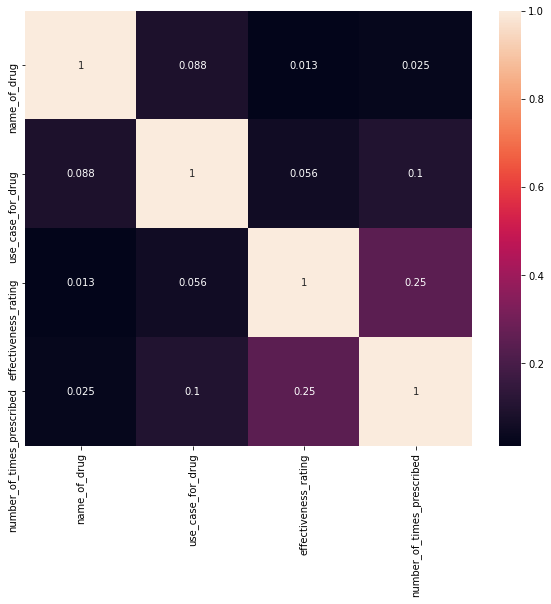

In [291]:
plt.figure(figsize = (10,8))
sns.heatmap(x_train.corr(),annot =True)
plt.show()

Checking the correlation between the features  

### Applying svm regressor 

In [249]:
from sklearn.svm import SVR
svm_model = SVR()

In [250]:
svm_model.fit(x_train , y_train)

SVR()

In [251]:
svm_model.score(x_test , y_test)

0.038128006897882094

#### worst accuracy

### Applying Linear regresssion 

In [252]:
from sklearn.linear_model import LinearRegression

In [253]:
linear_model = LinearRegression()

In [254]:
linear_model.fit(x_train , y_train)

LinearRegression()

In [255]:
linear_model.score(x_test , y_test)

0.17168322621022258

#### Worst Accuracy 

### Applying Random forest Regressor

In [256]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(x_train , y_train) 

RandomForestRegressor(random_state=0)

In [257]:
regressor.score(x_test , y_test)

0.9823827291543734

## Verry good accuracy on random forest classifier 

### Applying Decision tress regressor 

In [258]:
from sklearn.tree import DecisionTreeRegressor

In [259]:
decision_tree_regressor = DecisionTreeRegressor()

In [260]:
decision_tree_regressor.fit(x_train , y_train)

DecisionTreeRegressor()

In [261]:
decision_tree_regressor.score(x_test , y_test)

0.9708609889938956

## Very good acuracy on decision tree classifier 

## predicting values on the test set 

In [265]:
test_set = pd.read_csv(r'C:\Users\hp\Downloads\Neurance AI\test.csv')

In [266]:
test_set.shape

(10760, 7)

In [267]:
test_set.columns 

Index(['patient_id', 'name_of_drug', 'review_by_patient',
       'drug_approved_by_UIC', 'number_of_times_prescribed',
       'use_case_for_drug', 'effectiveness_rating'],
      dtype='object')

Removing 'patient_id' and 'drug_approved_by_UIC' not of sue to predict base_score

Removing  'review_by_patient' 

In [268]:
test_set.drop(['patient_id','drug_approved_by_UIC' ,'review_by_patient'] , axis = 1 , inplace = True)

In [269]:
test_set.columns 

Index(['name_of_drug', 'number_of_times_prescribed', 'use_case_for_drug',
       'effectiveness_rating'],
      dtype='object')

In [270]:
# Change the positions of column- 'number_of_times_prescribed'
fourth_column = test_set.pop('number_of_times_prescribed')
test_set.insert(3,'number_of_times_prescribed',fourth_column)

In [271]:
test_set.columns 

Index(['name_of_drug', 'use_case_for_drug', 'effectiveness_rating',
       'number_of_times_prescribed'],
      dtype='object')

Now all columns in correct sequence 

In [276]:
test_data = test_set.copy()

In [277]:
# Applying label encoding as done previous 

In [278]:
label_encoder = preprocessing.LabelEncoder()

test_data['name_of_drug']= label_encoder.fit_transform(test_data['name_of_drug'])

In [279]:
label_encoder = preprocessing.LabelEncoder()

test_data['use_case_for_drug']= label_encoder.fit_transform(test_data['use_case_for_drug'])

### Applying algorithms with best accuracy on the test_data

In [281]:
# using random forest model to predict base_score
# model above named regressor 
y_pred_regressor = regressor.predict(test_data)

In [282]:
y_pred_regressor

array([8.75720098, 8.74503683, 5.95227783, ..., 6.78824482, 5.30523211,
       8.19393369])

In [283]:
y_pred_regressor.shape

(10760,)

In [284]:
# using decision tree model to predict base_score
# model above name decision_tree_regressor
y_pred_decision_regressor = decision_tree_regressor.predict(test_data)

In [285]:
y_pred_decision_regressor

array([8.75720098, 8.74503683, 5.95227783, ..., 6.78824482, 5.30523211,
       8.19393369])

In [286]:
y_pred_decision_regressor.shape

(10760,)